In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [16]:
df_demo=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_demo.txt")
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [20]:
df_experiment=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_experiment_clients.txt")
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [2]:
#To be concaneted to df1
data_1=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_web_data_pt_1.txt")
data_2=pd.read_csv(r"C:\Users\Gebruiker\Desktop\IRONHACK\WEEK_5\TWEEDE_PROJECT\vanguard-ab-test\Data\Raw\df_final_web_data_pt_2.txt")


In [3]:
#checking for null values
data_1.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [4]:
#checking for duplictes for data_1
data_1.duplicated().sum()

2095

In [5]:
#drpping duplicates for data_1
data_1=data_1.drop_duplicates()
data_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [6]:
data_1.duplicated().sum()

0

In [7]:
#checking for null values for data_2
data_2.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [10]:
#checking for duplictes for data_2
data_2.duplicated().sum()

0

In [9]:
#droppinf duplicates for data_2
data_2=data_2.drop_duplicates()
data_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [12]:
#concatenated
df_web_data=pd.concat([data_1,data_2],axis="columns")
df_web_data

,client_id,visitor_id,visit_id,process_step,date_time,client_id,visitor_id,visit_id,process_step,date_time
0,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,763412.0,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,6019349.0,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,6019349.0,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,6019349.0,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,6019349.0,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...,...,...,...,...,...
412259,NaN,NaN,NaN,NaN,NaN,9668240.0,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,NaN,NaN,NaN,NaN,NaN,9668240.0,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,NaN,NaN,NaN,NaN,NaN,9668240.0,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,NaN,NaN,NaN,NaN,NaN,9668240.0,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [13]:
df_web_data.duplicated().sum()

0

In [17]:
#checking for duplicates for demo_data
df_demo.duplicated().sum()

0

In [18]:
#checking for null values for data_2
data_2.isna().sum()

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [74]:
#Filling missing values with the mode
df_demo=df_demo.fillna(df_demo.mode().iloc[0])
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [36]:
#checking for null values for df_experiment
df_experiment.isna().sum()

client_id    0
Variation    0
dtype: int64

In [22]:
#checking for duplicates  for df_experiment
df_experiment.duplicated().sum()

0

In [37]:
missing_values="Variation"
missing_indices=df_experiment[df_experiment[missing_values].isnull()].index
unique_categories=df_experiment[missing_values].unique()
df_experiment.loc[missing_indices,missing_values]=np.random.choice(unique_categories, len(missing_indices))
print(df_experiment[missing_values].isnull().sum())

0


In [45]:
print(df_experiment.index.duplicated())

[False False False ... False False False]


In [47]:
merged_df = pd.merge(df_web_data, df_experiment, left_index=True, right_index=True)
merged_df

,client_id_x,visitor_id,visit_id,process_step,date_time,client_id_x,visitor_id,visit_id,process_step,date_time,client_id_y,Variation
0,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,763412.0,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00,9988021,Test
1,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,6019349.0,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27,8320017,Test
2,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,6019349.0,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48,4033851,Control
3,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,6019349.0,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08,1982004,Test
4,9988021.0,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,6019349.0,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58,9294070,Control
...,...,...,...,...,...,...,...,...,...,...,...,...
69815,NaN,NaN,NaN,NaN,NaN,8540726.0,642755675_47323272700,660886448_70944656409_502394,start,2017-05-02 21:01:01,523595,Control
69832,NaN,NaN,NaN,NaN,NaN,8537473.0,678031568_27640581137,91886054_86292606717_324977,step_1,2017-05-23 11:41:17,3020958,Control
69842,NaN,NaN,NaN,NaN,NaN,5336956.0,126853146_14225685963,219509993_44577489165_267721,confirm,2017-05-30 13:33:24,9098888,Test
69873,NaN,NaN,NaN,NaN,NaN,1836963.0,206150084_5842595482,505424160_73271303842_792497,start,2017-06-17 11:52:07,1917150,Control


In [48]:
merged_df.duplicated().sum()

0

In [49]:
merged_df.isna().sum()

client_id_x      422
visitor_id       422
visit_id         422
process_step     422
date_time        422
client_id_x     1180
visitor_id      1180
visit_id        1180
process_step    1180
date_time       1180
client_id_y        0
Variation          0
dtype: int64

In [66]:
merged_df.dtypes

client_id_x     float64
visitor_id       object
visit_id         object
process_step     object
date_time        object
client_id_x     float64
visitor_id       object
visit_id         object
process_step     object
date_time        object
client_id_y       int64
Variation        object
dtype: object

In [55]:
#Frequency counts for 
fre_gender=df_demo["gendr"].value_counts()
fre_gender

gendr
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

The primary clients for this online platform are undicslosed however the males and females are active as well as the dfiiference is not that big.


<Axes: xlabel='gendr'>

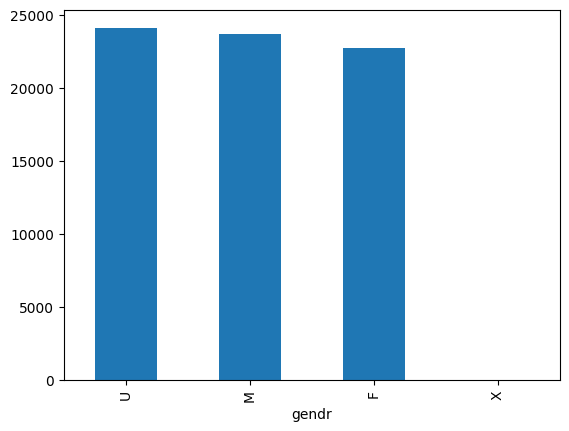

In [56]:
df_demo['gendr'].value_counts().plot(kind='bar')

In [22]:
# binning the age data into age groups
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]  # adjust bins as needed
bin_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
df_demo['age_group'] = pd.cut(df_demo['clnt_age'], bins=age_bins, labels=bin_labels, right=False)

# now you can get a simple count of clients within each age group
age_group_counts = df_demo['age_group'].value_counts().sort_index()
print(age_group_counts)

# gender count
gender_counts = df_demo['gendr'].value_counts()
print(gender_counts)

age_group
0-18        374
19-30     12925
31-40     13132
41-50     12419
51-60     15540
61-70     11950
71-80      3572
81-90       648
91-100       49
Name: count, dtype: int64
gendr
U    24136
M    23724
F    22746
X        3
Name: count, dtype: int64


In [36]:
# filter the df for only gender type 'U'
df_u = df_demo[df_demo['gendr'] == 'U']


#binning the ages
age_bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100] # adjust the bins

bin_labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

df_u.loc[:, 'age_group'] = pd.cut(df_u['clnt_age'], bins=age_bins, labels=bin_labels, right=False)

# counting the number of 'U' clients within each age group
age_group_counts_u = df_u['age_group'].value_counts().sort_index()
print(age_group_counts_u)

age_group
0-18       240
19-30     7418
31-40     4708
41-50     3633
51-60     4361
61-70     2986
71-80      654
81-90      122
91-100      14
Name: count, dtype: int64


In [ ]:
The primary clients are between the age of 19 and 30

In [43]:
# binning the tenure_years data into year groups
year_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50]  # adjust bins as needed
bin_labels = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '31-35', '36-40', '41-50']
df_demo['tenure_year'] = pd.cut(df_demo['clnt_tenure_yr'], bins=year_bins, labels=bin_labels, right=False)

# now you can get a simple count of clients within each age group
year_group_counts = df_demo['tenure_year'].value_counts().sort_index()
print(year_group_counts)

# tenure count
tenure_counts = df_demo['clnt_tenure_yr'].value_counts()
print(gender_counts)

tenure_year
0-5       5217
6-10     26418
11-15    16579
16-20    11010
21-25     7454
26-30     2592
31-35     1041
36-40      215
41-50       57
Name: count, dtype: int64
clnt_tenure_yr
6.0     7106
5.0     6955
7.0     4955
4.0     4687
15.0    4564
8.0     4045
14.0    3646
12.0    3631
13.0    3607
9.0     3357
11.0    2920
10.0    2775
16.0    2714
21.0    2257
20.0    1580
22.0    1492
17.0    1373
23.0    1279
18.0    1206
19.0    1153
24.0     846
26.0     660
27.0     632
28.0     507
25.0     484
3.0      449
29.0     309
30.0     303
33.0     206
32.0     191
34.0     175
31.0     166
35.0     102
2.0       81
36.0      36
37.0      35
38.0      33
48.0      16
39.0       9
40.0       9
55.0       9
50.0       8
47.0       6
43.0       6
42.0       6
46.0       5
51.0       5
49.0       4
44.0       3
52.0       2
54.0       1
41.0       1
45.0       1
62.0       1
Name: count, dtype: int64


In [13]:
# Summary statistics for the dataset
df_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70609.000000,70609.000000,70609.000000,70609.000000,7.060900e+04,70609.000000,70609.000000
mean,5.004992e+06,12.051750,150.640995,46.444802,2.255477,1.474222e+05,3.382997,5.567421
std,2.877278e+06,6.871666,82.092083,15.590607,0.534956,3.014833e+05,2.236662,2.353549
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.733040e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.332209e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375217e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


<Axes: xlabel='gendr'>

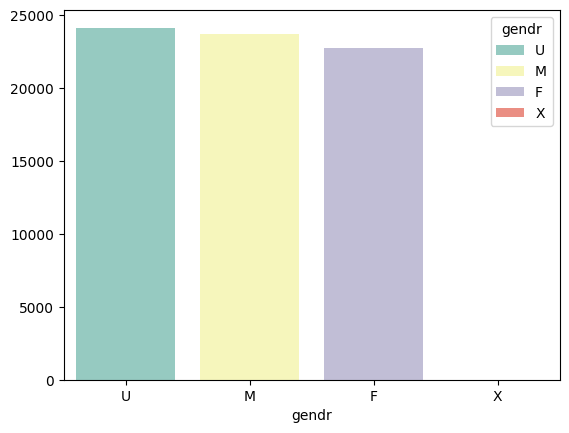

In [49]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=fre_gender.index, y=fre_gender.values, hue=fre_gender.index, palette="Set3", legend=True)

In [27]:
#Summary statistis for the data frame
df_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70609.000000,70609.000000,70609.000000,70609.000000,7.060900e+04,70609.000000,70609.000000
mean,5.004992e+06,12.051750,150.640995,46.444802,2.255477,1.474222e+05,3.382997,5.567421
std,2.877278e+06,6.871666,82.092083,15.590607,0.534956,3.014833e+05,2.236662,2.353549
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.733040e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.332209e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375217e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000
